<a href= "Universal%20Approximation%20Theorem.ipynb" target = "_blank">
    <h3>Universal approximation theorem</h3>
</a>

# Extreme Learning Machine (ELM) 
<a href='ELM-Workshop-NUS.pdf'>Presentation</a>

https://towardsdatascience.com/ml-for-ts-3-extreme-learning-machines-3fcf5991e390

An EML is a Single-Layer Feed-Forward Neural Network (SLFN). ELM theory show that the value of the weight of this hidden layer need not to be tuned, and be therefore independent of the training data.  

The universal approximation property implies that an EML can solve any regression problem with a desired accuracy, if it has enough hidden neurons and training data to learn parameters for all the hidden neurons.  

ELM is actually solving a generalized linear problem :

$ Hβ=Y $

where H is the matrix of the hidden layer output, β is the weight vector (or matrix) connecting the hidden layer and the output layer and Y

symbolizes the target of your training.

The goal is to find β

using the pseudo-inverse of H.

Solving this problem is equivalent of finding the β
achieving the minimum of the Least-square problem :

$β=\underset{β}{min} ||Hβ−Y|| $  

The absolutely greatest advantage of EMLs is that they are very cheap computationally for implementing online models

<img src='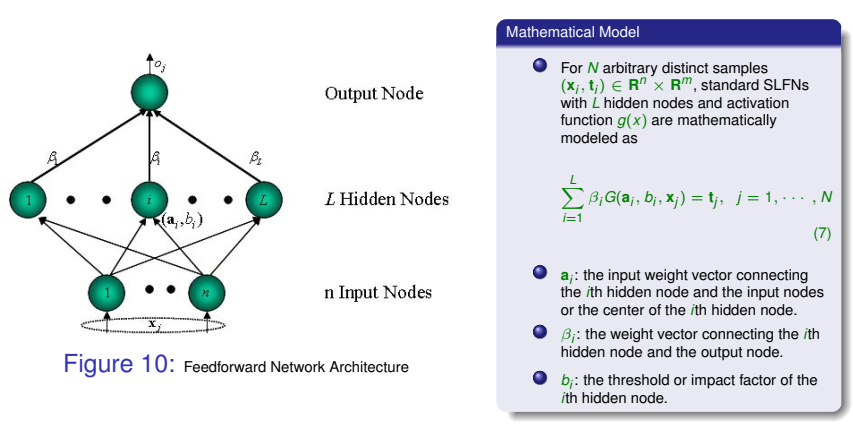
'>

<img src='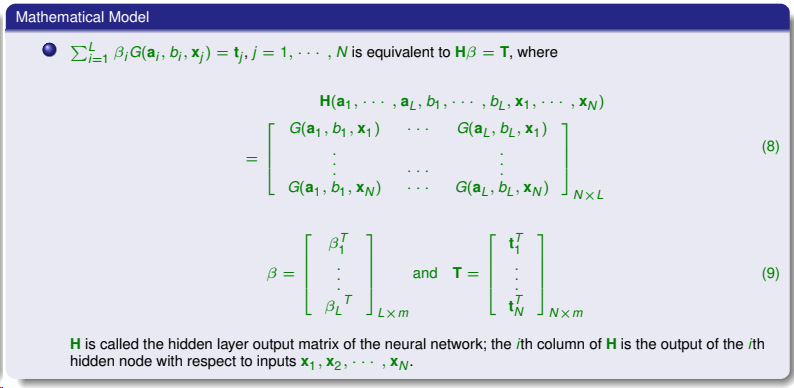
'>

<img src='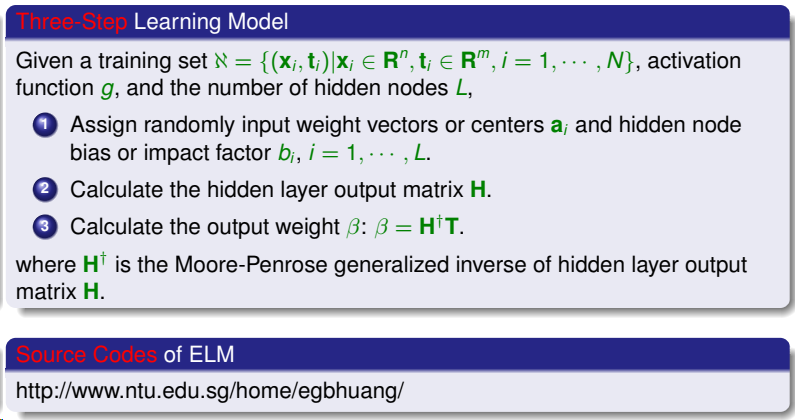
'>

<img src='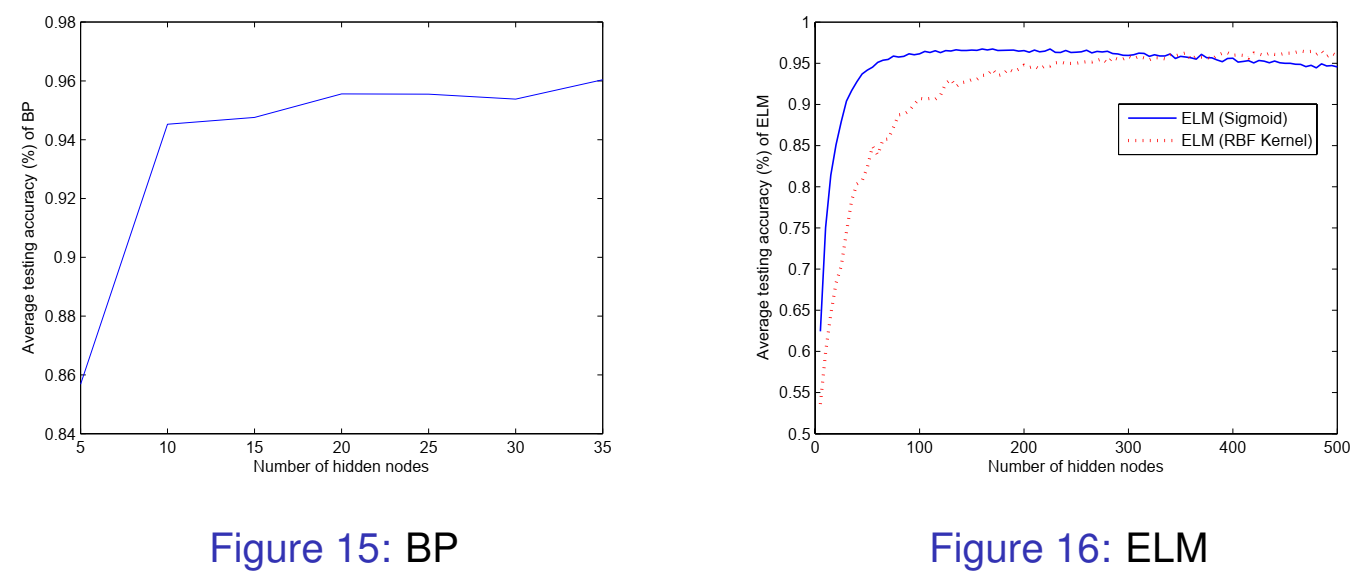
'>

<img src='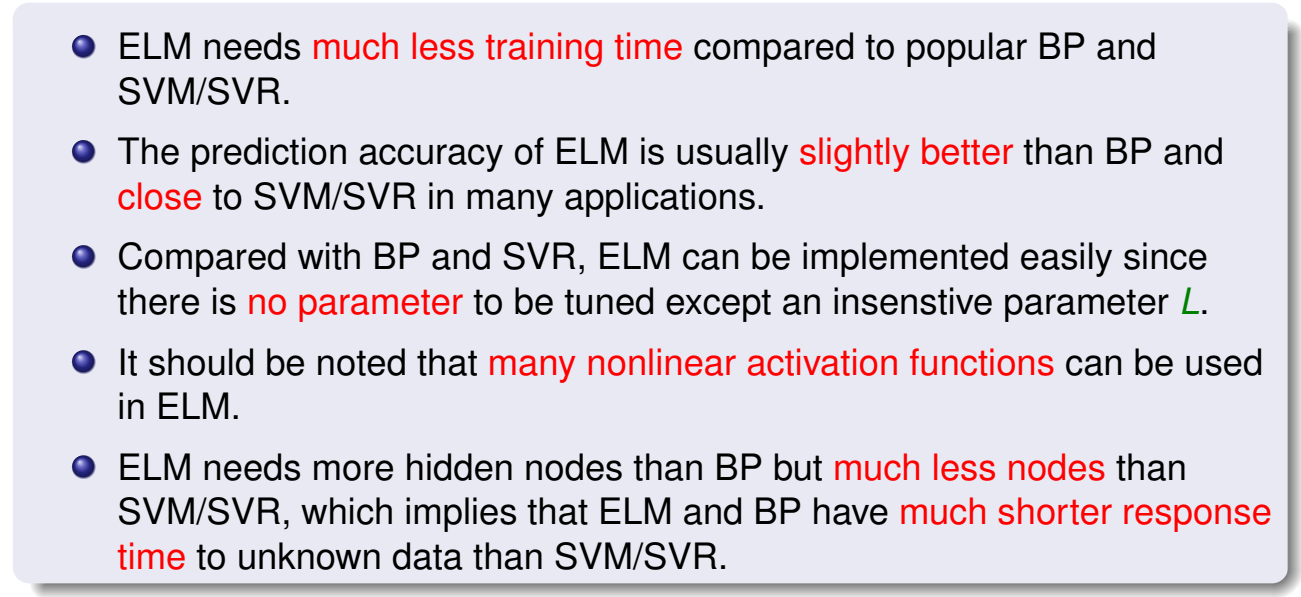
'>

### ELM is a special case of [RVFL(Random Vector Functional-Link Network)](RVFL.ipynb)



# Implementation

MLP-ELM-Classifier in keras style: https://github.com/otenim/Numpy-ELM  
用于分类问题，不适用于回归

[Alternative implementation (more complex)](https://github.com/dclambert/Python-ELM)

### 代码解析

Forward Propagation:  
`t = self.__activation(x.dot(self.__alpha) + self.__bias) .dot(self.__beta)`

Parameter Initialization:  
$ A_{ij} \in (-1, 1) $, $ b_{i} = 0  $

Fit/Solve:  
$ T = G( XA + b ) B $   
define $ H = G( XA + b ) $ , then $ B = H^{+} T $ 

A: `__alpha`   b: `__bias`   B: `__beta`  G: `sigmoid()`   

### Moore–Penrose inverse

$ H^{+} $ is the Moore–Penrose inverse of H. It is the most widely known generalization of the inverse matrix.  
The term pseudoinverse, without further specification, is often used to indicate the Moore–Penrose inverse. The term generalized inverse is sometimes used as a synonym for pseudoinverse.  
A common use of the pseudoinverse is to compute a "best fit" (least squares) solution to a system of linear equations that lacks a unique solution.  

In [42]:
%run "../../machine learning/source/18. pyNNRW/github/src/pyNNRW/ELM.py"

## 案例1：一维数据的回归问题

(158, 1) (40, 1) (158, 1) (40, 1)


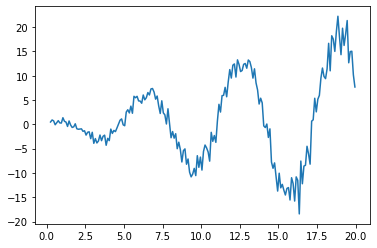

In [4]:
from sklearn.cluster import k_means
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# from elm import ELMClassifier, ELMRegressor, GenELMClassifier, GenELMRegressor
# from random_layer import RandomLayer, MLPRandomLayer, RBFRandomLayer, GRBFRandomLayer

def make_toy():
    x = np.arange(0.25,20,0.1)
    y = x*np.cos(x)+0.5*np.sqrt(x)*np.random.randn(x.shape[0])
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    return x, y

xtoy, ytoy = make_toy()
# xtoy, ytoy = stdsc.fit_transform(xtoy), stdsc.fit_transform(ytoy)
x_train, x_test, t_train, t_test = train_test_split(xtoy, ytoy, test_size=0.2)
plt.plot(xtoy, ytoy)
print(x_train.shape, x_test.shape, t_train.shape, t_test.shape)

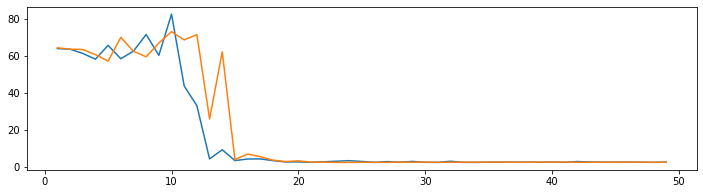

In [5]:
Ls = list(range(1, 50, 1))

plt.figure(figsize = (12,3))

MSEs = []
for i in Ls:
    MSE,_,_,_ = ElmRegression(x_train, x_test, t_train, t_test, L = i)
    MSEs.append(MSE)
plt.plot(Ls, MSEs)

MSEs = []
for i in Ls:
    MSE,_,_,_ = ElmRegression(x_train, x_test, t_train, t_test, L = i, rndb = True)
    MSEs.append(MSE)
plt.plot(Ls, MSEs)

观察点：
1. MSE 随着 Hidden Layer的神经元数量L增加而减小，在L = 14附近，收敛到极小值。L影响模型的表达能力/复杂度  
2. 偏置项b的随机化策略，对于最终结果无影响。

MSE =  40.675


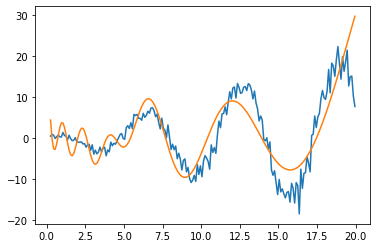

In [6]:
MSE,A,b,B = ElmRegression(x_train, x_test, t_train, t_test, L = 14)
plt.plot(xtoy, ytoy, xtoy, _sigmoid(xtoy @ A + b) @ B)
print("MSE = ", round(MSE,3))

## 案例2： Iris Dataset

In [51]:
%run "../../machine learning/source/18. pyNNRW/github/src/pyNNRW/ELM.py"

ELMClassifier.run_iris_example()

train_loss: 0.138269
train_acc: 0.983333
val_loss: 0.154513
val_acc: 0.933333


========== prediction on the first 10 test samples ===========

---------- prediction 1 ----------
class: 1, probability: 1.035951
class (true): 1
---------- prediction 2 ----------
class: 2, probability: 0.482680
class (true): 1
---------- prediction 3 ----------
class: 1, probability: 0.600387
class (true): 1
---------- prediction 4 ----------
class: 0, probability: 0.995760
class (true): 0
---------- prediction 5 ----------
class: 1, probability: 0.922325
class (true): 1
---------- prediction 6 ----------
class: 2, probability: 1.144414
class (true): 2
---------- prediction 7 ----------
class: 0, probability: 1.112040
class (true): 0
---------- prediction 8 ----------
class: 1, probability: 0.912143
class (true): 1
---------- prediction 9 ----------
class: 0, probability: 1.068488
class (true): 0
---------- prediction 10 ----------
class: 0, probability: 1.114278
class (true): 0


观察点：  
1. 由于没有类似于梯度下降的迭代过程，求解速度极快。  
1. 由于权重矩阵A和偏置项b的随机性，每次运行结果不同。可以运行多次，选取最优  
2. 一步到位求解得到权重矩阵B，不存在在训练集过拟合的现象，CV上的准确率有可能高于训练集  

## 案例3： MNIST

In [52]:
ELMClassifier.run_mnist_example()

train_loss: 2.101519
train_acc: 0.564817
val_loss: 1.936080
val_acc: 0.578500


========== prediction on the first 10 test samples ===========

---------- prediction 1 ----------
class: 7, probability: 0.510527
class (true): 7
---------- prediction 2 ----------
class: 7, probability: 0.310001
class (true): 2
---------- prediction 3 ----------
class: 1, probability: 0.336756
class (true): 1
---------- prediction 4 ----------
class: 0, probability: 0.455529
class (true): 0
---------- prediction 5 ----------
class: 4, probability: 0.552366
class (true): 4
---------- prediction 6 ----------
class: 1, probability: 0.455375
class (true): 1
---------- prediction 7 ----------
class: 4, probability: 0.204445
class (true): 4
---------- prediction 8 ----------
class: 9, probability: 0.256101
class (true): 9
---------- prediction 9 ----------
class: 0, probability: 0.318317
class (true): 5
---------- prediction 10 ----------
class: 9, probability: 0.506740
class (true): 9
